In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/c9/8t42c60d22d2m1m_z6lc5_z00000gn/T/ipykernel_3543/733379284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_excel('/Users/bhumeshpanchal/Documents/Bhumesh/Mtech/Placement_prep/JPMC_SImulation/nat_gas_price.xlsx', parse_dates=['Dates'])


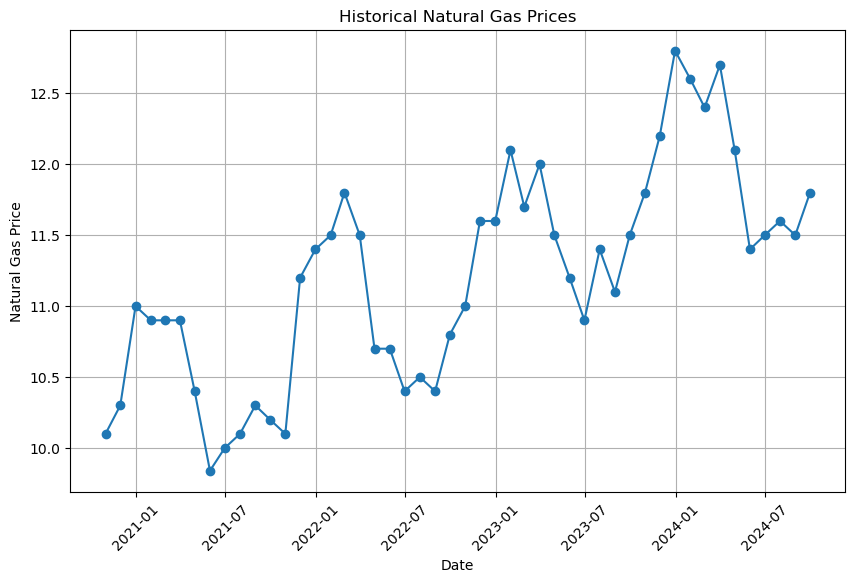

In [2]:
data = pd.read_excel('/Users/bhumeshpanchal/Documents/Bhumesh/Mtech/Placement_prep/JPMC_SImulation/nat_gas_price.xlsx', parse_dates=['Dates'])
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Historical Natural Gas Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [3]:
def estimate_price(date):
    # Convert the input date to datetime
    date = pd.to_datetime(date)

    # Extract the month and day from the input date
    month = date.month
    day = date.day

    # Filter the data to include only the relevant month and next year
    relevant_data = data[(data['Dates'].dt.month == month) & (data['Dates'].dt.year <= date.year + 1)]

    # Linear interpolation
    price_estimate = np.interp(day, relevant_data['Dates'].dt.day, relevant_data['Prices'])

    return price_estimate

# Test the estimate_price function
input_date = '2025-05-15'
estimated_price = estimate_price(input_date)
print(f"Estimated Natural Gas Price on {input_date}: {estimated_price:.2f}")

Estimated Natural Gas Price on 2025-05-15: 9.84


In [4]:
def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month):
    total_value = 0

    # Iterate through each injection and withdrawal pair
    for i in range(len(injection_dates)):
        injection_date = injection_dates[i]
        withdrawal_date = withdrawal_dates[i]
        purchase_price = purchase_prices[i]
        sale_price = sale_prices[i]

        # Calculate the time between injection and withdrawal in months
        time_months = (withdrawal_date - injection_date).days / 30.44

        # Calculate the gas cost and sale revenue
        gas_cost = purchase_price * injection_rate * time_months
        sale_revenue = sale_price * injection_rate * time_months

        # Calculate storage costs
        storage_months = (withdrawal_date - injection_date).days / 30.44
        total_storage_cost = storage_cost_per_month * storage_months

        # Calculate total cost and value
        total_cost = gas_cost + total_storage_cost
        contract_value = sale_revenue - total_cost

        # Add contract value to total
        total_value += contract_value

    return total_value

In [5]:
# Test the calculate_contract_value function
injection_dates = [pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-15')]
withdrawal_dates = [pd.to_datetime('2023-09-15'), pd.to_datetime('2023-11-15')]
purchase_prices = [2.5, 2.6]  # $/MMBtu
sale_prices = [3.5, 3.6]  # $/MMBtu
injection_rate = 1000000  # MMBtu
max_volume = 5000000  # MMBtu
storage_cost_per_month = 100000  # $

contract_value = calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month)
print(f"Estimated Contract Value: ${contract_value:.2f}")

Estimated Contract Value: $8160315.37
